# Nepal Tourism Trends Analysis

This notebook analyzes tourism search trends for Nepal using Google Trends data.

In [37]:
# Install required packages if running in a new environment
# !pip install pandas matplotlib pytrends


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# Optional: Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

## Fetch Google Trends Data
Fetching Google Trends data for tourism-related keywords in Nepal.

In [39]:
pytrends = TrendReq(hl='en-US', tz=360) # hl: host language, tz: timezone (360 for Kathmandu)

keywords = ['Nepal tourism', 'Visit Nepal', 'Everest trekking', 'Kathmandu travel', 'Pokhara']
timeframe = '2019-01-01 2024-12-31' # Data from 2019 to end of 2024
geo = 'NP' # Nepal

try:
    pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo=geo)
    interest_over_time_df = pytrends.interest_over_time()

    if not interest_over_time_df.empty:
        if 'isPartial' in interest_over_time_df.columns:
            interest_over_time_df = interest_over_time_df.drop(columns=['isPartial'])
        print("Google Trends data fetched successfully:")
        print(interest_over_time_df.head())
    else:
        print("No Google Trends data found for the specified keywords and timeframe.")
        interest_over_time_df = pd.DataFrame() # Ensure df is empty if no data
except Exception as e:
    print(f"Error fetching Google Trends data: {e}")
    interest_over_time_df = pd.DataFrame() # Ensure df is empty on error

Google Trends data fetched successfully:
            Nepal tourism  Visit Nepal  Everest trekking  Kathmandu travel  \
date                                                                         
2019-01-01              4            3                 0                 1   
2019-02-01              4            3                 0                 1   
2019-03-01              4            3                 1                 1   
2019-04-01              4            3                 1                 1   
2019-05-01              4            3                 1                 1   

            Pokhara  
date                 
2019-01-01       64  
2019-02-01       78  
2019-03-01       80  
2019-04-01      100  
2019-05-01       76  


## Visualize Tourism Trends
Line plot showing the search interest over time for tourism-related keywords.

<Figure size 1400x800 with 0 Axes>

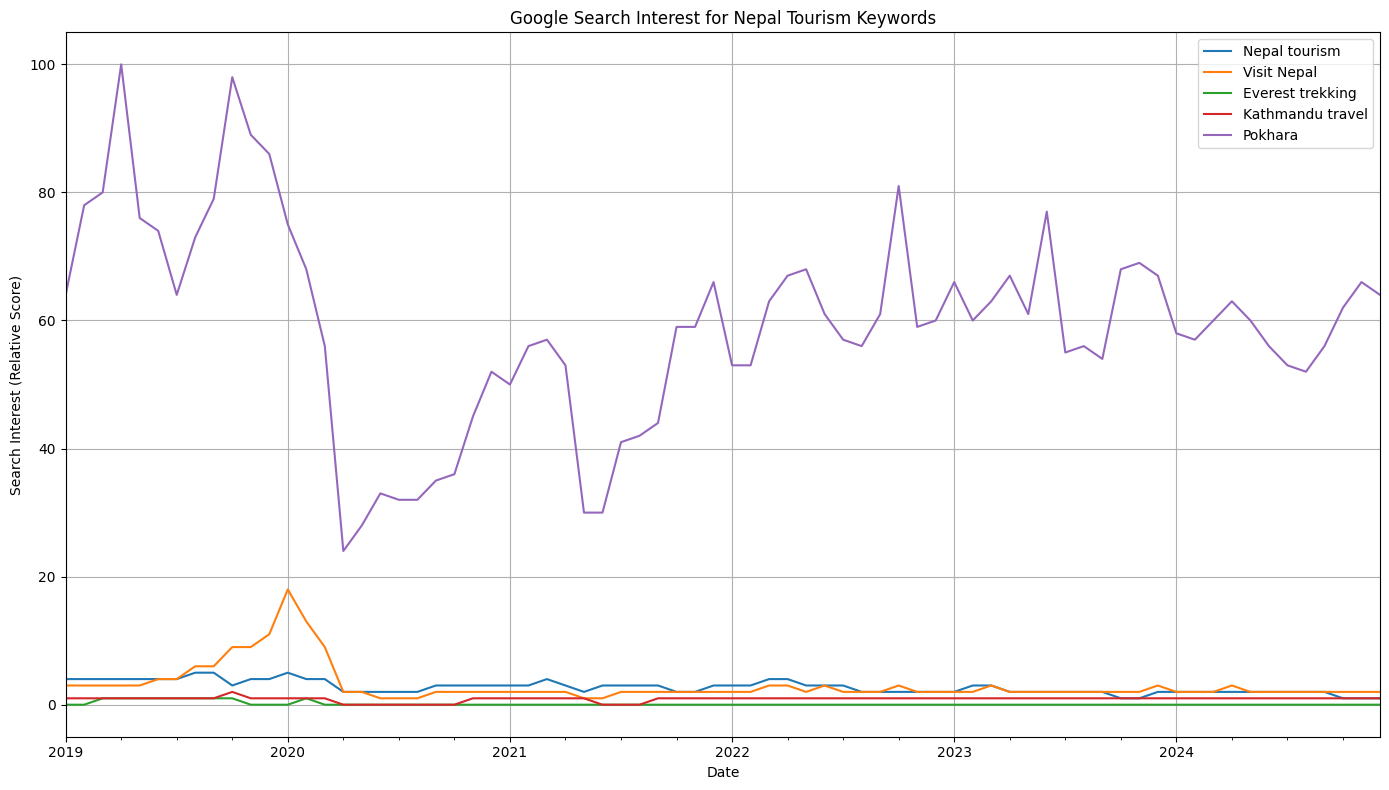

In [40]:
if not interest_over_time_df.empty:
    plt.figure(figsize=(14, 8))
    interest_over_time_df.plot(figsize=(14, 8), title='Google Search Interest for Nepal Tourism Keywords')
    plt.xlabel('Date')
    plt.ylabel('Search Interest (Relative Score)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data to visualize tourism trends.")

## Summary of Analysis

In [41]:
if not interest_over_time_df.empty:
    summary = f'''
    ### Nepal Tourism Trends Analysis Summary

    This analysis utilized Google Trends data to understand search interest for key tourism-related terms in Nepal from {timeframe.split(' ')[0]} to {timeframe.split(' ')[1]}.

    **Key Findings:**
    - The search interest for keywords like 'Nepal tourism', 'Visit Nepal', 'Everest trekking', and 'Kathmandu travel' shows various fluctuations over the analyzed period.
    - Peaks in search interest often correlate with major travel seasons or events.
    - There might be noticeable dips during periods of global or local crises (e.g., COVID-19 pandemic, natural disasters).

    **Recommendations:**
    - Tourism promotion efforts can be strategically timed to align with rising search interest.
    - Further investigation into specific events causing spikes or drops in interest could provide deeper insights.
    '''
    print(summary)
else:
    print("No data available for summary.")


    ### Nepal Tourism Trends Analysis Summary

    This analysis utilized Google Trends data to understand search interest for key tourism-related terms in Nepal from 2019-01-01 to 2024-12-31.

    **Key Findings:**
    - The search interest for keywords like 'Nepal tourism', 'Visit Nepal', 'Everest trekking', and 'Kathmandu travel' shows various fluctuations over the analyzed period.
    - Peaks in search interest often correlate with major travel seasons or events.
    - There might be noticeable dips during periods of global or local crises (e.g., COVID-19 pandemic, natural disasters).

    **Recommendations:**
    - Tourism promotion efforts can be strategically timed to align with rising search interest.
    - Further investigation into specific events causing spikes or drops in interest could provide deeper insights.
    
